# Classic Courant-Isaacson-Rees method

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import clear_output, HTML
from tqdm import tqdm_notebook

In [2]:
# Plotting functions

def plot(u):
    """ u(x, t) for fixed t """
    global x
    plt.figure()#figsize=(10, 6)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.plot(x, u)

def plot_all(u):
    plt.figure(figsize=(6, 6))
    plt.imshow(u)
    plt.xlabel('$x$')
    plt.ylabel('$t$')
    cbar = plt.colorbar()
    cbar.set_label('$u(x, t)$')

def animate(data):
    global x
    y = data
    line.set_data(x,y)
    return line,

Initial condition:

$u(x, 0) = \phi(x) \ge \varepsilon > 0$

Boundary conditions:

$u(x_0, t) = \phi(x_0)$

$u(x_1, t) = \phi(x_1)$

In [3]:
x0, x1 = -5, 5
Nx = 101
x = np.linspace(x0, x1, Nx, dtype=np.float64)

In [4]:
Nt = 101
t = np.zeros(Nt, dtype=np.float64)

In [5]:
eps = 1
def phi0(x):
    return np.where(np.abs(x + 2) > 2, 0, 2-np.abs(x + 2)) + eps
def phi1(x):
    return np.exp(-(x + 2)**2) + eps
def phi2(x):
    return 1 / np.cosh(x + 2) ** 2 + eps

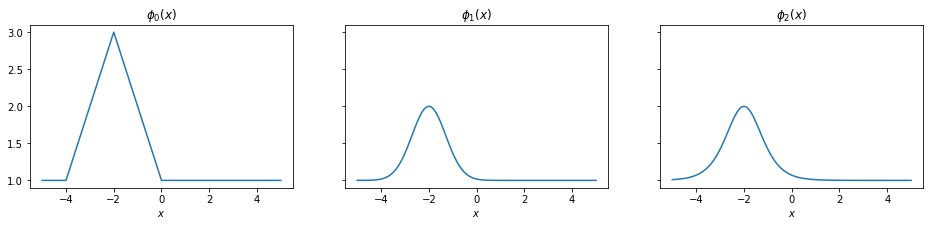

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 3), sharey=True)
for i, phi in enumerate([phi0, phi1, phi2]):
    axs[i].plot(x, phi(x))
    axs[i].set_title(f'$\phi_{i}(x)$')
    axs[i].set_xlabel('$x$')

In [7]:
u = np.ones((Nt, Nx), dtype=np.float64) * eps
u[0] = phi0(x)

In [8]:
h = (x1 - x0) / (Nx - 1)
Cu = 0.9

$\dfrac{y_m^{n+1} - y_m^n}{\tau} + \dfrac{(y_m^n)^2 - (y_{m-1}^n)^2}{2h} = 0$

$y_m^{n+1} = y_m^n - \dfrac{\tau}{2h}((y_m^n)^2 - (y_{m-1}^n)^2)$

In [9]:
for n in tqdm_notebook(range(Nt - 1)):
    tau = Cu * h / np.max(u[n])
    u[n + 1, 1:] = u[n, 1:] - 0.5 * tau / h * (u[n, 1:] ** 2 - u[n, :-1] ** 2)
    
    # ГУ
    u[n + 1, [0, -1]] = u[n, [0, -1]]
    
    t[n + 1] = t[n] + tau

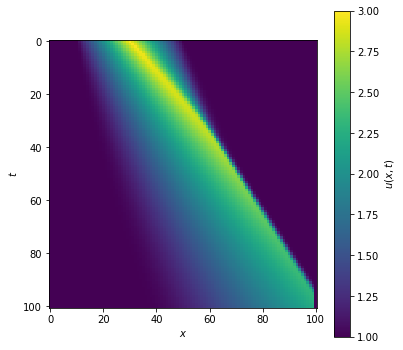

In [10]:
plot_all(u)

In [11]:
fig = plt.figure();#figsize=(10, 6)
ax = plt.axes(xlim=(-5,5),ylim=(0,5), xlabel=('$x$'),ylabel=('$u(x)$'));
line, = plt.plot([],[]); # ,color='#003366', lw=2

anim = animation.FuncAnimation(fig, animate, frames=u, interval=100);

#anim.save('gifs/CIR_ref.gif', writer='pillow')
anim.save('GC_CIR_ref.mp4', writer="ffmpeg")

In [12]:
HTML(anim.to_jshtml())

In [13]:
HTML(anim.to_html5_video())

In [14]:
u_ref = u.copy()
%store u_ref

Stored 'u_ref' (ndarray)
